In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
#import seaborn as sb

In [2]:
#sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of NAPROXEN (Metabolite_id = 1660)

In [4]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select bioanalysis_metabolite_price.date, bioanalysis_metabolite_price.price, bioanalysis_metabolite_price.amount, bioanalysis_metabolite_price.unity, provider.name as provider_name
                                 from bioanalysis_metabolite_price
                                 JOIN provider 
                                 on provider.id = bioanalysis_metabolite_price.provider_id
                                 where metabolite_id = 1660; ''', cnx, index_col = 'date', parse_dates=True)


df = pd.DataFrame(sql_query, columns=['price', 'amount', 'unity', 'provider_name'])
print(df)


                     price  amount unity             provider_name
date                                                              
2017-10-24 16:34:49   38.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49   42.0     2.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49   55.0     5.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49   70.0    10.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49  100.0    20.0    mg  Vitas-M Laboratory, Ltd.
...                    ...     ...   ...                       ...
2019-07-14 16:07:07  340.0    10.0     g            Pharmeks, Ltd.
2019-07-14 16:07:07   20.0     1.0     g           UkrOrgSynthesis
2019-07-14 16:07:07   21.0     2.5     g           UkrOrgSynthesis
2019-07-14 16:07:07   22.0     5.0     g           UkrOrgSynthesis
2019-07-14 16:07:07   23.0    10.0     g           UkrOrgSynthesis

[882 rows x 4 columns]


In [5]:
df.unity.unique()

array(['mg', 'g'], dtype=object)

In [6]:
# Converter unidades 
for i in df.unity.unique():
    df.price = np.where(df.unity == i, df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
    df.amount = np.where(df.unity == i, 1, df.amount)

print(df)


                     price  amount unity             provider_name
date                                                              
2017-10-24 16:34:49   38.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49   21.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49   11.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49    7.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49    5.0     1.0    mg  Vitas-M Laboratory, Ltd.
...                    ...     ...   ...                       ...
2019-07-14 16:07:07   34.0     1.0     g            Pharmeks, Ltd.
2019-07-14 16:07:07   20.0     1.0     g           UkrOrgSynthesis
2019-07-14 16:07:07    8.4     1.0     g           UkrOrgSynthesis
2019-07-14 16:07:07    4.4     1.0     g           UkrOrgSynthesis
2019-07-14 16:07:07    2.3     1.0     g           UkrOrgSynthesis

[882 rows x 4 columns]


In [7]:
# Converter x gramas em 1g !!
df.price = np.where(df.unity == 'g', df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.unity == 'g', 1, df.amount)
print(df)

                     price  amount unity             provider_name
date                                                              
2017-10-24 16:34:49   38.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49   21.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49   11.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49    7.0     1.0    mg  Vitas-M Laboratory, Ltd.
2017-10-24 16:34:49    5.0     1.0    mg  Vitas-M Laboratory, Ltd.
...                    ...     ...   ...                       ...
2019-07-14 16:07:07   34.0     1.0     g            Pharmeks, Ltd.
2019-07-14 16:07:07   20.0     1.0     g           UkrOrgSynthesis
2019-07-14 16:07:07    8.4     1.0     g           UkrOrgSynthesis
2019-07-14 16:07:07    4.4     1.0     g           UkrOrgSynthesis
2019-07-14 16:07:07    2.3     1.0     g           UkrOrgSynthesis

[882 rows x 4 columns]


In [8]:
#See results grouped by provider_name
grouped_df = df.groupby(['unity','provider_name'])

for key, item in grouped_df:
    print('Unity, Provider:', key)
    print(grouped_df.get_group(key), "\n\n")

Unity, Provider: ('g', 'Aldlab')
                     price  amount unity provider_name
date                                                  
2017-10-24 16:34:49    2.4     1.0     g        Aldlab
2017-11-24 17:37:25    2.4     1.0     g        Aldlab
2018-02-09 06:03:05    2.4     1.0     g        Aldlab
2018-03-09 07:37:09    2.4     1.0     g        Aldlab
2018-04-09 11:19:23    2.4     1.0     g        Aldlab
2018-05-09 12:04:23    2.4     1.0     g        Aldlab
2018-06-10 01:12:42    2.4     1.0     g        Aldlab
2018-07-10 03:30:31    2.4     1.0     g        Aldlab
2018-08-19 23:36:12    2.4     1.0     g        Aldlab
2018-09-19 23:39:16    2.4     1.0     g        Aldlab
2018-10-19 23:39:17    2.4     1.0     g        Aldlab
2018-11-20 00:39:20    2.4     1.0     g        Aldlab
2018-12-07 04:38:03    2.4     1.0     g        Aldlab
2019-01-07 04:38:11    2.4     1.0     g        Aldlab
2019-02-07 04:38:41    2.4     1.0     g        Aldlab
2019-03-07 04:38:53    2.4     1

                     price  amount unity   provider_name
date                                                    
2017-10-24 16:34:49    0.1     1.0    mg  Pharmeks, Ltd.
2017-11-24 17:37:25    0.1     1.0    mg  Pharmeks, Ltd.
2018-02-09 06:03:05    0.1     1.0    mg  Pharmeks, Ltd.
2018-03-09 07:37:09    0.1     1.0    mg  Pharmeks, Ltd.
2018-04-09 11:19:23    0.1     1.0    mg  Pharmeks, Ltd.
2018-05-09 12:04:23    0.1     1.0    mg  Pharmeks, Ltd.
2018-06-10 01:12:42    0.1     1.0    mg  Pharmeks, Ltd.
2018-07-10 03:30:31    0.1     1.0    mg  Pharmeks, Ltd.
2018-08-19 23:36:12    0.1     1.0    mg  Pharmeks, Ltd.
2018-09-19 23:39:16    0.1     1.0    mg  Pharmeks, Ltd.
2018-10-19 23:39:17    0.1     1.0    mg  Pharmeks, Ltd.
2018-11-20 00:39:20    0.1     1.0    mg  Pharmeks, Ltd.
2018-12-07 04:38:03    0.1     1.0    mg  Pharmeks, Ltd.
2019-01-07 04:38:11    0.1     1.0    mg  Pharmeks, Ltd.
2019-02-07 04:38:41    0.1     1.0    mg  Pharmeks, Ltd.
2019-03-07 04:38:53    0.1     

c:\users\sofia\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



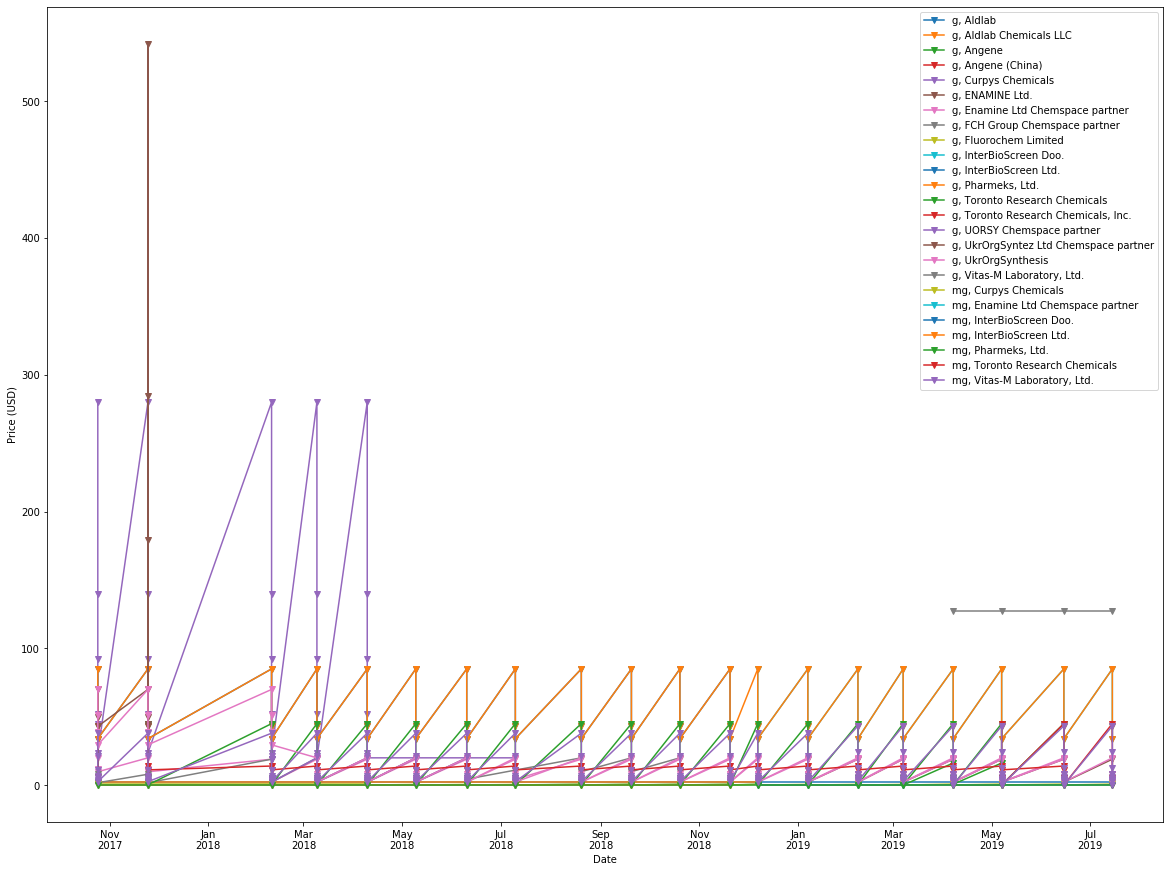

In [9]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['unity','provider_name'])['price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [10]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of NAPROXEN',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)


opt_list = []
for key, item in grouped_df:
#     print('key:', key)
    opt_list.append(str(key[0] + ' ' + key[1]))

# print('opt_list:', opt_list)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['unity','provider_name'])['price']:
    x = pd.to_datetime(g.index)
    y = g.values
    k = str(k[0] + ' ' + k[1])
#     print('k: ', k)
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
#         print(d_x)
#         print(d_y)
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a unity,provider lacking on the x or y dict.')
    
    
def update_plot(unity):#, freq):
   data = []
   for s in unity:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines',
           name = 'u, p {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
unity = widgets.SelectMultiple(options = opt_list, description = 'Unity, Prov') #value = key_list,
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, unity = unity )#, freq = freq)

interactive(children=(SelectMultiple(description='Unity, Prov', options=('g Aldlab', 'g Aldlab Chemicals LLC',…

Neste caso o provider oxchem é o que tem o preço mais baixo para a gama dos gramas.